In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r'C:\Users\user\Desktop\assignment3\spending_patterns_detailed.csv')

In [3]:
print(data.head())  # Check first 5 rows
print(data.columns)  # Check column names
print(data.info())  # Check dataset structure

  Customer ID               Category                 Item  Quantity  \
0   CUST_0159              Groceries                 Milk         1   
1   CUST_0017      Friend Activities  Dinner with Friends         2   
2   CUST_0094  Housing and Utilities           Water Bill         1   
3   CUST_0162                Fitness           Yoga Class         5   
4   CUST_0129                  Gifts              Flowers         3   

   Price Per Unit  Total Spent  Payment Method    Location Transaction Date  
0            1.28         1.28      Debit Card  Mobile App       2024-11-13  
1           74.69       149.39      Debit Card    In-store       2023-05-04  
2           76.06        76.06  Digital Wallet  Mobile App       2023-12-16  
3           11.24        56.18            Cash    In-store       2024-01-28  
4           43.71       131.12      Debit Card    In-store       2023-07-28  
Index(['Customer ID', 'Category', 'Item', 'Quantity', 'Price Per Unit',
       'Total Spent', 'Payment Me

In [4]:
print(data.isnull().sum())  # Count missing values per column

Customer ID         0
Category            0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64


In [5]:
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])  # Convert to datetime
data['Quantity'] = pd.to_numeric(data['Quantity'])
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'])
data['Total Spent'] = pd.to_numeric(data['Total Spent'])

In [11]:
print(data.describe(include='all'))

       Customer ID   Category           Item      Quantity  Price Per Unit  \
count        10000      10000          10000  10000.000000    10000.000000   
unique         200         13             48           NaN             NaN   
top      CUST_0142  Groceries  Dentist Visit           NaN             NaN   
freq            72        799            278           NaN             NaN   
mean           NaN        NaN            NaN      2.237200      969.957948   
min            NaN        NaN            NaN      1.000000        1.000000   
25%            NaN        NaN            NaN      1.000000       12.960000   
50%            NaN        NaN            NaN      1.000000       51.860000   
75%            NaN        NaN            NaN      3.000000      177.587500   
max            NaN        NaN            NaN      5.000000    74246.460000   
std            NaN        NaN            NaN      1.481133     6104.403843   

          Total Spent  Payment Method  Location            Tran

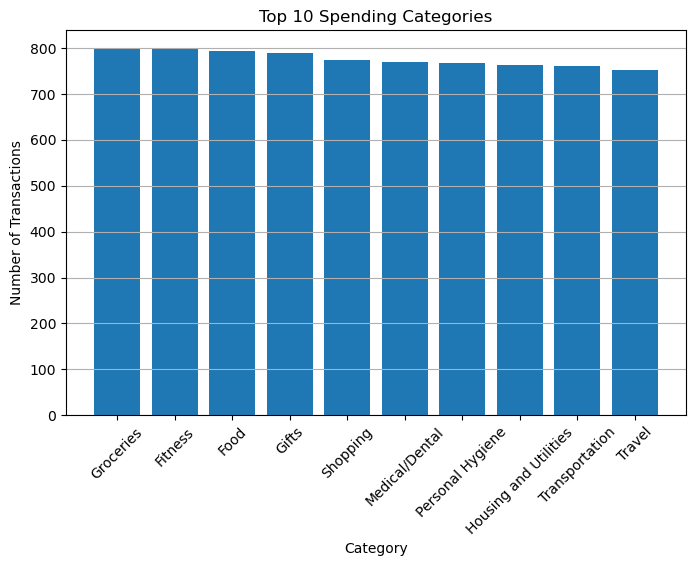

In [13]:
import matplotlib.pyplot as plt

# Count the number of transactions per category
category_counts = data['Category'].value_counts().head(10)  # Top 10 categories

# Create bar chart
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values)

# Labels and title
plt.title('Top 10 Spending Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')

plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y')

plt.show()


In [15]:
#Chart Overview
#The chart displays the top 10 most common spending categories based on the number of transactions.
#The X-axis represents different spending categories (e.g., Groceries, Fitness, Food, Gifts).
#The Y-axis represents the number of transactions for each category.
#Each bar's height indicates how frequently people spent in that category.

#The categories Groceries and Fitness have the highest number of transactions.
#The bars appear to have similar heights, meaning that spending is fairly evenly distributed across different categories.
#Categories such as Travel have slightly lower transaction counts than others.

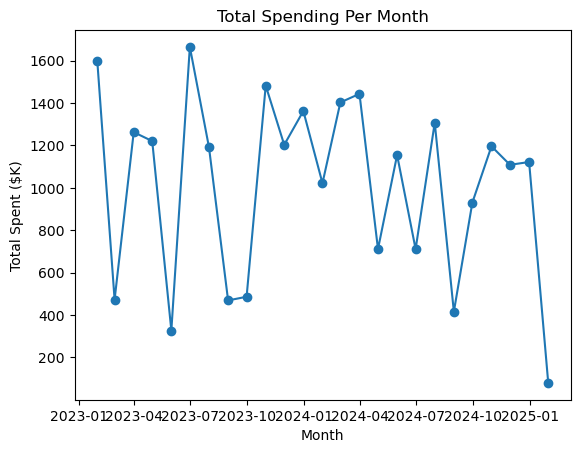

In [17]:
import matplotlib.pyplot as plt

# Group by month-end and sum 'Total Spent' (convert to thousands)
monthly_spending = data.resample('ME', on='Transaction Date')['Total Spent'].sum() / 1000

# Create line chart
plt.plot(monthly_spending.index, monthly_spending.values, marker='o')

# Labels and title
plt.title('Total Spending Per Month')
plt.xlabel('Month')
plt.ylabel('Total Spent ($K)')

plt.show()


In [19]:
#Chart Overview
#This chart shows total spending per month over a period of time.
#The Y-axis represents the total amount spent (in thousands, $K).
#The X-axis represents the months, spanning from early 2023 to early 2025.
#The dots represent the spending values for each month, connected by a line to show trends over time.

#There are major fluctuations in spending across months, with some months showing sharp increases and decreases.
#Some months have very high spending, possibly due to special events, holidays, or promotions.
#Other months have low spending, which could indicate off-season periods.

#The highest spending peaks reach around $1.6M ($1600K) in May to June 2023.

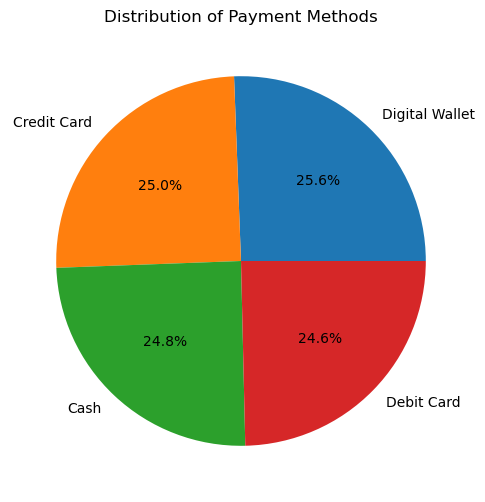

In [21]:
# Count payment method usage
payment_counts = data['Payment Method'].value_counts().head(4)

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%')

# Title
plt.title('Distribution of Payment Methods')

plt.show()

In [23]:
#The four payment methods (Digital Wallet, Credit Card, Cash, Debit Card) are almost equally used.
#Digital Wallets (25.6%) are the most used, suggesting that customers prefer fast and secure digital transactions.
#ebit Cards (24.6%) are the least used, which may indicate that many people either prefer using credit or digital payment options over direct bank withdrawals.